In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

# Полиномиальный случай

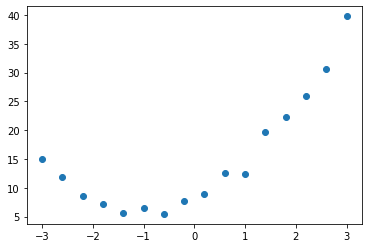

In [16]:
def f(x):
    return 2 * x ** 2 + 4 * x + 8

x = np.linspace(-3, 3, 16)
y_true = f(x) 
y_noised = y_true + np.random.normal(0, 1, x.shape[0])


# plt.scatter(x, y_true)
plt.scatter(x, y_noised)

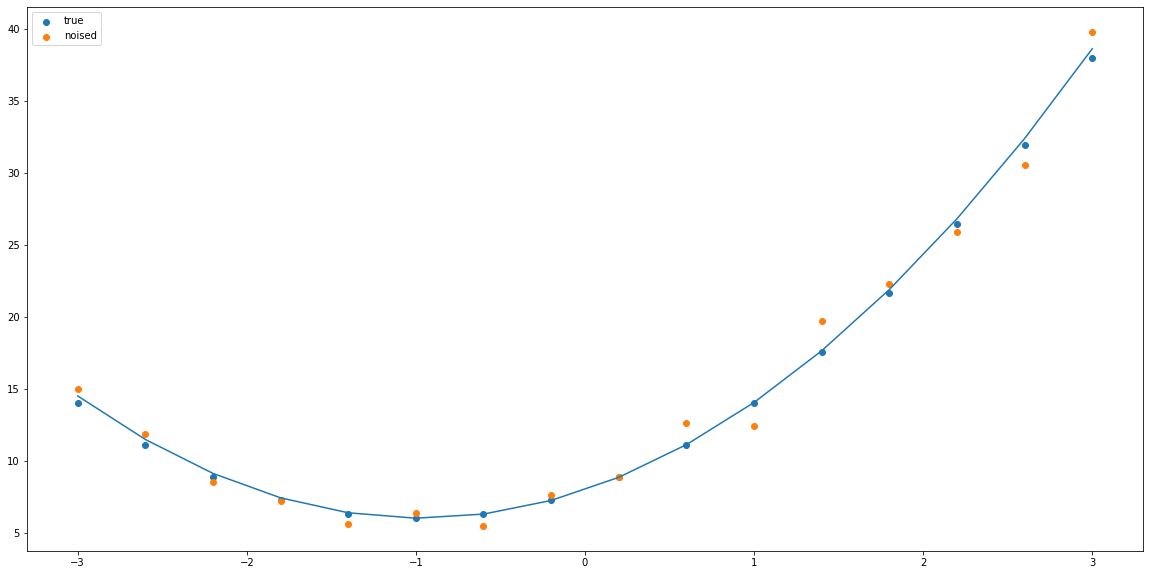

In [32]:
x_col = x.reshape(-1, 1)

x_prime = np.hstack([x_col / x_col, x_col, x_col ** 2])

model = LinearRegression(fit_intercept=False)
model.fit(x_prime, y_noised)

plt.figure(figsize=(20, 10))
y_pred = model.predict(x_prime)
plt.scatter(x, y_true, label='true')
plt.scatter(x, y_noised, label='noised')
plt.plot(x, y_pred)
plt.legend()

In [33]:
model.coef_

array([7.95727758, 4.0204107 , 2.0669735 ])

# Экспоненциальный случай

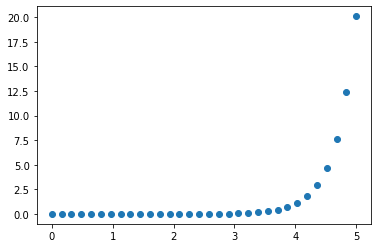

In [53]:
def f(x):
    return np.exp(3 * x - 12)

x = np.linspace(0, 5, 32)
y = f(x) 

plt.scatter(x, y)

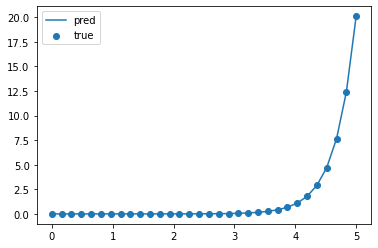

In [65]:
x_col = x.reshape(-1, 1)
y_log = np.log(y)

model = LinearRegression(fit_intercept=True)
model.fit(x_col, y_log)

# plt.figure(figsize=(20, 10))

y_pred = np.exp(model.predict(x_col))
plt.scatter(x, y, label='true')
plt.plot(x, y_pred, label='pred')

plt.legend()

In [62]:
model.coef_, model.intercept_

(array([3.]), -12.0)

# Непараметрическая регрессия

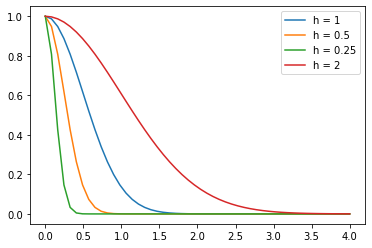

In [81]:
def K(rho):
    return np.exp(-2 * rho ** 2)

rhos = np.linspace(0, 4)
plt.plot(rhos, K(rhos / 1), label='h = 1')
plt.plot(rhos, K(rhos / 0.5), label='h = 0.5')
plt.plot(rhos, K(rhos / 0.25), label='h = 0.25')
plt.plot(rhos, K(rhos / 2), label='h = 2')
plt.legend()

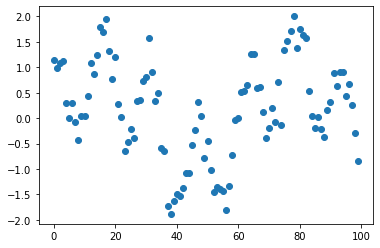

In [90]:
np.random.seed(42)

x = np.arange(0, 100, 1)
y = np.sin(0.1 * x) + np.cos(0.4 * x)

y_noised = y + np.random.normal(0, 0.3, size=y.size)
plt.scatter(x, y_noised)
# plt.plot(x, y, 'r')

$$y^*(x, X^l) =  \frac{\sum_{i=1}^l y_iw_i }{\sum_{i=1}^l w_i } = \frac{\sum_{i=1}^l y_i K(\frac{\rho(x, x_i)}{h}) } {\sum_{i=1}^l  K(\frac{\rho(x, x_i)}{h}) } $$

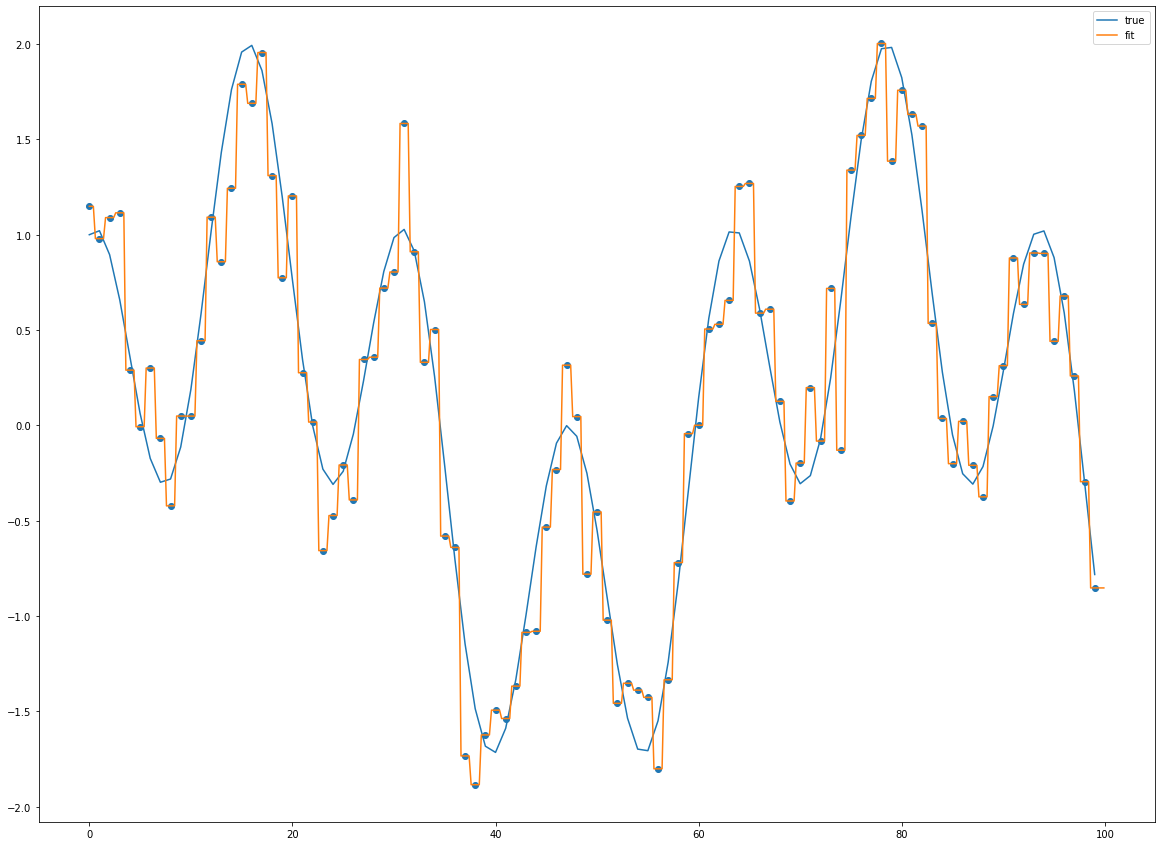

In [91]:
def rho(x1, x2):
    return np.abs(x1 - x2)

h = 0.1
xfit = np.arange(0, 100, 0.1)
yfit = []

for xf in xfit:
    w = []
    for xi, yi in zip(x, y_noised):
        wi = K(rho(xi, xf) / h)
        w.append(wi)
        
    w = np.array(w)
    yf = np.sum(y_noised * w) / np.sum(w)
    
    yfit.append(yf)
    
yfit = np.array(yfit)

plt.figure(figsize=(20, 15))
plt.scatter(x, y_noised)
plt.plot(x, y, label='true')
plt.plot(xfit, yfit, label='fit')

plt.legend()